# House Prices: Feature Engineering

Inspired by [this](https://medium.com/swlh/explained-kaggle-housing-prices-feature-engineering-and-ridge-regression-88934ad37edc)

In the previous notebook, you saw how to perform feature engineering on the Titanic dataset. In this notebook, you will perform feature engineering on the House Prices dataset yourself.

We start again by loading the raw dataset.

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd 

house_prices_df = pd.read_csv(os.path.join(data_directory, "house-prices/train.csv"), sep= ",", index_col = "Id")
house_prices_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

# Get the Labels 

After the loading the data, we first get the labels of the data. The labels are the target values that we want to predict. In this case, the labels are the prices of the houses. We store the labels in a variable called `y_true`. This variable contains the "ground truth", or the true house price value, values that we want to predict. By comparing the predicted values of the model to the true values, we can evaluate the performance of the model.

In [17]:
y_true = house_prices_df["SalePrice"]
y_true.shape

(1460,)

## Columns in the Dataset

To do the feature engineering, the first thing we need to know is what all columns mean. Here's a brief version of what you'll find in the data description file. 
For more information, see also [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

| Column         | Description |
|----------------|-------------|
| SalePrice      | The property's sale price in dollars. This is the target variable that you're trying to predict. |
| MSSubClass     | The building class |
| MSZoning       | The general zoning classification |
| LotFrontage    | Linear feet of street connected to property |
| LotArea        | Lot size in square feet |
| Street         | Type of road access |
| Alley          | Type of alley access |
| LotShape       | General shape of property |
| LandContour    | Flatness of the property |
| Utilities      | Type of utilities available |
| LotConfig      | Lot configuration |
| LandSlope      | Slope of property |
| Neighborhood   | Physical locations within Ames city limits |
| Condition1     | Proximity to main road or railroad |
| Condition2     | Proximity to main road or railroad (if a second is present) |
| BldgType       | Type of dwelling |
| HouseStyle     | Style of dwelling |
| OverallQual    | Overall material and finish quality |
| OverallCond    | Overall condition rating |
| YearBuilt      | Original construction date |
| YearRemodAdd   | Remodel date |
| RoofStyle      | Type of roof |
| RoofMatl       | Roof material |
| Exterior1st    | Exterior covering on house |
| Exterior2nd    | Exterior covering on house (if more than one material) |
| MasVnrType     | Masonry veneer type |
| MasVnrArea     | Masonry veneer area in square feet |
| ExterQual      | Exterior material quality |
| ExterCond      | Present condition of the material on the exterior |
| Foundation     | Type of foundation |
| BsmtQual       | Height of the basement |
| BsmtCond       | General condition of the basement |
| BsmtExposure   | Walkout or garden level basement walls |
| BsmtFinType1   | Quality of basement finished area |
| BsmtFinSF1     | Type 1 finished square feet |
| BsmtFinType2   | Quality of second finished area (if present) |
| BsmtFinSF2     | Type 2 finished square feet |
| BsmtUnfSF      | Unfinished square feet of basement area |
| TotalBsmtSF    | Total square feet of basement area |
| Heating        | Type of heating |
| HeatingQC      | Heating quality and condition |
| CentralAir     | Central air conditioning |
| Electrical     | Electrical system |
| 1stFlrSF       | First Floor square feet |
| 2ndFlrSF       | Second floor square feet |
| LowQualFinSF   | Low quality finished square feet (all floors) |
| GrLivArea      | Above grade (ground) living area square feet |
| BsmtFullBath   | Basement full bathrooms |
| BsmtHalfBath   | Basement half bathrooms |
| FullBath       | Full bathrooms above grade |
| HalfBath       | Half baths above grade |
| BedroomAbvGr   | Number of bedrooms above basement level |
| KitchenAbvGr   | Number of kitchens |
| KitchenQual    | Kitchen quality |
| TotRmsAbvGrd   | Total rooms above grade (does not include bathrooms) |
| Functional     | Home functionality rating |
| Fireplaces     | Number of fireplaces |
| FireplaceQu    | Fireplace quality |
| GarageType     | Garage location |
| GarageYrBlt    | Year garage was built |
| GarageFinish   | Interior finish of the garage |
| GarageCars     | Size of garage in car capacity |
| GarageArea     | Size of garage in square feet |
| GarageQual     | Garage quality |
| GarageCond     | Garage condition |
| PavedDrive     | Paved driveway |
| WoodDeckSF     | Wood deck area in square feet |
| OpenPorchSF    | Open porch area in square feet |
| EnclosedPorch  | Enclosed porch area in square feet |
| 3SsnPorch      | Three season porch area in square feet |
| ScreenPorch    | Screen porch area in square feet |
| PoolArea       | Pool area in square feet |
| PoolQC         | Pool quality |
| Fence          | Fence quality |
| MiscFeature    | Miscellaneous feature not covered in other categories |
| MiscVal        | Value of miscellaneous feature |
| MoSold         | Month Sold |
| YrSold         | Year Sold |
| SaleType       | Type of sale |
| SaleCondition  | Condition of sale |

Using this information and more detailed looks into the data distributions and relationships, you can engineer new features that will help your model make better predictions. Good luck!

In [1]:
#begin solution

## Pearson's Correlation Matrix

The first thing we can do to see which features are important is to calculate the Pearson's correlation matrix and check which features have a high correlation with the target variable `SalePrice`. This matrix shows the correlation between all features and the label. The correlation is a value between -1 and 1. A value of 1 means that the feature is perfectly correlated with the label, a value of -1 means that the feature is perfectly negatively correlated with the label, and a value of 0 means that there is no correlation between the feature and the label.

In [18]:
correlation_matrix=house_prices_df.corr(numeric_only=True)
correlation_matrix['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

## Multi-Collinearity

Another thing to look out for is multi-collinearity. This happens when two or more features are highly correlated with each other. This can cause problems in the model, because the model will not be able to distinguish between the effects of the two features. This can lead to overfitting. To check for multi-collinearity, we can use the Pearson's correlation matrix from above and check for features that are highly correlated with each other. Let's plot a heatmap of the correlation matrix to see the highly correlated features.

<Axes: >

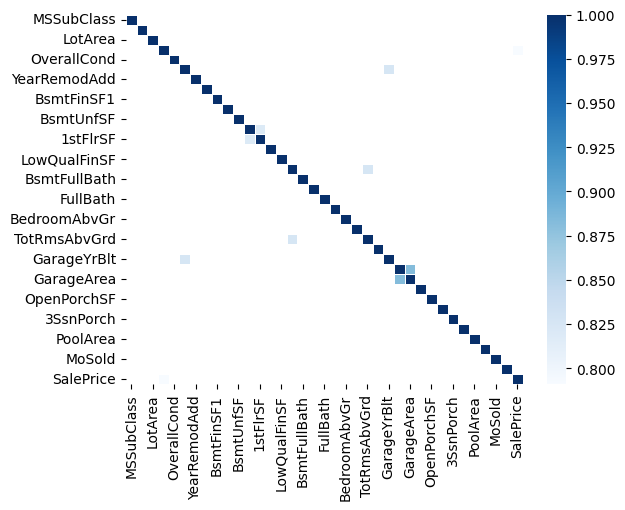

In [19]:
import seaborn as sns

sns.heatmap(correlation_matrix, mask=correlation_matrix.abs() < 0.75, linewidth=0.5, cmap='Blues')

In [20]:
correlation_matrix[(correlation_matrix.abs() > 0.75) & (correlation_matrix.abs() < 1)].dropna(how='all', axis=1).dropna(how='all', axis=0)

OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  \
OverallQual           NaN        NaN          NaN       NaN        NaN   
YearBuilt             NaN        NaN          NaN       NaN        NaN   
TotalBsmtSF           NaN        NaN          NaN   0.81953        NaN   
1stFlrSF              NaN        NaN      0.81953       NaN        NaN   
GrLivArea             NaN        NaN          NaN       NaN        NaN   
TotRmsAbvGrd          NaN        NaN          NaN       NaN   0.825489   
GarageYrBlt           NaN   0.825667          NaN       NaN        NaN   
GarageCars            NaN        NaN          NaN       NaN        NaN   
GarageArea            NaN        NaN          NaN       NaN        NaN   
SalePrice        0.790982        NaN          NaN       NaN        NaN   

              TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  SalePrice  
OverallQual            NaN          NaN         NaN         NaN   0.790982  
YearBuilt              NaN     0.825667         NaN         NaN        NaN  
TotalBsmtSF            NaN          NaN         NaN         NaN        NaN  
1stFlrSF               NaN          NaN         NaN         NaN        NaN  
GrLivArea         0.825489          NaN         NaN         NaN        NaN  
TotRmsAbvGrd           NaN          NaN         NaN         NaN        NaN  
GarageYrBlt            NaN          NaN         NaN         NaN        NaN  
GarageCars             NaN          NaN         NaN    0.882475        NaN  
GarageArea             NaN          NaN    0.882475         NaN        NaN  
SalePrice              NaN          NaN         NaN         NaN        NaN

In the figure above, we see that all the features on the diagonal are perfectly correlated with themselves, which is expected. More importantly, we also see that some other features are highly correlated with each other. These are the lighter blue squares off the diagonal in the figure above. We see that:

- `GarageYrBlt` and `YearBuilt` are highly correlated with each other
- `TotalBsmtSF` and `1stFlrSF` are highly correlated with each other
- `TotRmsAbvGrd` and `GrLivArea` are highly correlated with each other
- `GarageCars` and `GarageArea` are highly correlated with each other

So, we can remove one of these features from the dataset to avoid multi-collinearity. For example, we can remove `GarageYrBlt`, `1stFlrSF`, `TotRmsAbvGrd`, and `GarageCars` from the dataset.
Also `OverallQual` and `SalePrice` are highly correlated with each other. However, this is a high correlation with the target variable, and means that `OverallQual` is a good feature to use in the model. We would like to keep it of course. Let's remove the other features from the dataset.

In [21]:
house_prices_df = house_prices_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'])
house_prices_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

## Remove the Label Column

Now we added new features, the last step before training a classifier is to remove the label column from the training data. The label column is the column that we want to predict and therefore cannot be used as a feature. If we do not remove the label column, the model will be able to perfectly predict the label, it could be as easy as returning the label column value. However, in this case, the model will not be able to generalize to new data. 

In [22]:
house_train_df = house_prices_df.copy().drop(columns = ["SalePrice"])
house_train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
2          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
3          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
4          Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
5          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

   MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                               
1          NaN       0       2    2008        WD         Normal  
2          NaN       0       5    2007        WD         Normal  
3          NaN       0       9    2008        WD         Normal  
4          NaN       0       2    2006        WD        Abnorml  
5          NaN       0      12    2008        WD         Normal  

[5 rows x 75 columns]

## Encoding categorical features

Before training a base level algorithm, we need to encode the categorical features. The regression algorithms can only work with numerical features. Therefore, we need to encode the categorical features into numerical features. We use the sklearn `LabelEncoder` to do this. The `LabelEncoder` encodes the categorical features into numerical features.

In [24]:
categorical_columns = house_train_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

for column in categorical_columns:
    label_encoder = LabelEncoder()
    house_train_df[column] = label_encoder.fit_transform(house_train_df[column].astype(str))

house_train_df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                        
1           60         3         65.0     8450       1      2         3   
2           20         3         80.0     9600       1      2         3   
3           60         3         68.0    11250       1      2         0   
4           70         3         60.0     9550       1      2         0   
5           60         3         84.0    14260       1      2         0   

    LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
Id                                     ...                                  
1             3          0          4  ...            0         0       3   
2             3          0          2  ...            0         0       3   
3             3          0          4  ...            0         0       3   
4             3          0          0  ...            0         0       3   
5             3          0          2  ...            0         0       3   

    Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                        
1       4            4        0       2    2008         8              4  
2       4            4        0       5    2007         8              4  
3       4            4        0       9    2008         8              4  
4       4            4        0       2    2006         8              0  
5       4            4        0      12    2008         8              4  

[5 rows x 75 columns]

In [40]:
house_train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', '

## Get Base level performance (without added features)

We want to see how well the model performs without the added features. This will give us a baseline performance. We will use a `RandomForestRegressor` to predict the house prices. We will use the `root mean squared error` as the evaluation metric. The `root mean squared error` is a metric that measures the square root of the average squared difference between the predicted values and the true values. The lower the `root mean squared error`, the better the model is at predicting the house prices. The `root mean squared error` is a nice metric, because we can interpret it in the same units as the target variable.

In [26]:
from sklearn.model_selection import train_test_split

train_base_df, test_base_df, y_train_base, y_test_base = train_test_split(house_train_df, y_true, test_size=0.2, random_state=42) 

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error


rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(train_base_df, y_train_base)

y_pred_base = rf.predict(test_base_df)

rms_base = root_mean_squared_error(y_test_base, y_pred_base)
print(rms_base)

28689.689977657108


## Deriving new features

After preparing the dataset, you can now derive some new features. For example, you can create a new feature that is the sum of two other features, or the difference between two other features. You can also create new features based on the domain knowledge of the dataset. For example, in the Titanic dataset, you could create a new feature that is the sum of the number of siblings and the number of parents/children. This new feature could be a good predictor of survival. Likewise, in the House Prices dataset, you could create a new feature that is the sum of the square footage of the basement, first floor, and second floor, etc. Try to create some new features and see if they improve the performance of the model.

Next to creating new features, also remember to encode the categorical features, treat the missing values, and scale the features.

In [44]:
house_train_df["YearsSinceRemod"] = house_train_df["YrSold"] - house_train_df["YearRemodAdd"]
house_train_df["Age"] = house_train_df["YrSold"] - house_train_df["YearBuilt"]
house_train_df["TotalHomeQuality"] = house_train_df["OverallQual"] + house_train_df["OverallCond"]
house_train_df["TotalPorchArea"] = house_train_df["OpenPorchSF"] + house_train_df["EnclosedPorch"] + house_train_df["3SsnPorch"] + house_train_df["ScreenPorch"]
house_train_df["TotalBathrooms"] = house_train_df["FullBath"] + house_train_df["HalfBath"] + house_train_df["BsmtFullBath"] + house_train_df["BsmtHalfBath"]

house_train_df["BedBath"] = house_train_df["BedroomAbvGr"] * house_train_df["TotalBathrooms"]
house_train_df["TotalLot"] = house_train_df["LotFrontage"] + house_train_df["LotArea"]
house_train_df["sqft_feet_living"] = house_train_df["GrLivArea"] + house_train_df["TotalBsmtSF"]


## Train a Regression Model with the derived features

After deriving the new features, you can train a regression model with the new features. By using the same train/test split and the same model we can measure how much the model improves by adding the derived features. 

In [45]:
train_df, test_df, y_train, y_test = train_test_split(house_train_df, y_true, test_size=0.2, random_state=42) 

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(train_df, y_train)

y_pred = rf.predict(test_df)

rms_improved = root_mean_squared_error(y_test, y_pred)

print(rms_improved)
print(f"Improvement: {rms_improved - rms_base}")


29057.878774057157
Improvement: 368.1887964000489


In [2]:
#end solution

# Conclusion

In this notebook, you added new features to the House Prices dataset and trained a regression model with the new features. By comparing the performance of the model with and without the new features, you saw that also in regression tasks, feature engineering is an important step in the machine learning pipeline. Always when training models on Tabular datasets, try to see if you can add domain knowledge/features to the dataset to try and improve the performance of the model.